In [161]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor

In [3]:
aqi_df=pd.read_csv('E:\Python_Learning\ML\Data_air_quality\Real_data\Final_AQI_data.csv')

In [4]:
aqi_df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,24.5,32.6,19.5,1010.7,65.0,6.3,3.0,7.6,284.795833
1,23.1,32.8,16.1,1011.9,62.0,6.3,1.3,5.4,219.720833
2,21.8,32.2,14.4,1012.7,59.0,5.5,1.9,7.6,182.187500
3,16.4,30.7,7.5,1013.7,59.0,5.8,1.1,3.5,154.037500
4,18.5,29.5,9.0,1014.3,66.0,5.5,1.7,9.4,223.208333


In [5]:
print('Columns in the datase - ',[x for x in aqi_df.columns])

Columns in the datase -  ['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5']


In [6]:
print('Nulls in the dataset')
aqi_df.isna().sum()

Nulls in the dataset


T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    2
dtype: int64

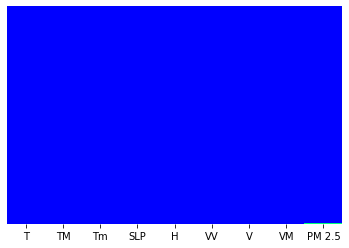

In [7]:
sns.heatmap(aqi_df.isnull(),yticklabels=False,cbar=False,cmap='winter')

In [8]:
print('As we can see, there is no skewed data in the dataset as the mean and 50% are almost the same.\nAlso we can replace the 2 missing values in PM 2.5 with mean value.')
aqi_df.describe()

As we can see, there is no skewed data in the dataset as the mean and 50% are almost the same.
Also we can replace the 2 missing values in PM 2.5 with mean value.


,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1091.000000
mean,24.791674,31.599817,18.414547,1009.095517,62.209515,6.436597,3.411070,7.882251,109.112542
std,3.396148,3.999888,4.585824,3.916560,17.436358,0.750980,2.719805,5.831975,82.751757
min,14.800000,18.900000,0.700000,998.800000,25.000000,4.000000,0.200000,1.900000,0.000000
25%,22.800000,28.700000,14.600000,1006.100000,50.000000,6.300000,1.300000,5.400000,44.270833
50%,24.600000,31.000000,19.900000,1008.800000,63.000000,6.300000,2.800000,7.600000,83.833333
75%,26.900000,34.400000,22.000000,1012.400000,77.000000,6.900000,4.800000,9.400000,153.229167
max,33.300000,41.300000,27.400000,1019.300000,98.000000,15.600000,18.900000,77.800000,404.500000


In [9]:
aqi_df=aqi_df.fillna(value=aqi_df['PM 2.5'].mean())
print('Status of nulls  - ', aqi_df.isna().sum())

Status of nulls  -  T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64


In [10]:
print('Checking the correaltion matrix of the features :')
aqi_df.corr()

Checking the correaltion matrix of the features :


,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.753239,0.742937,-0.574583,-0.326990,0.415846,0.393402,0.246274,-0.441488
TM,0.753239,1.000000,0.190468,-0.065981,-0.767216,0.350086,0.011148,0.008104,-0.064812
Tm,0.742937,0.190468,1.000000,-0.811060,0.334111,0.263140,0.610858,0.376319,-0.589994
SLP,-0.574583,-0.065981,-0.811060,1.000000,-0.328667,-0.207121,-0.638533,-0.413226,0.580128
H,-0.326990,-0.767216,0.334111,-0.328667,1.000000,-0.224937,0.208726,0.120700,-0.202671
VV,0.415846,0.350086,0.263140,-0.207121,-0.224937,1.000000,0.266602,0.160725,-0.221833
V,0.393402,0.011148,0.610858,-0.638533,0.208726,0.266602,1.000000,0.696432,-0.440549
VM,0.246274,0.008104,0.376319,-0.413226,0.120700,0.160725,0.696432,1.000000,-0.302753
PM 2.5,-0.441488,-0.064812,-0.589994,0.580128,-0.202671,-0.221833,-0.440549,-0.302753,1.000000


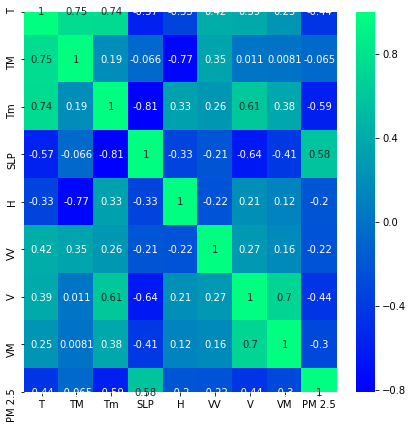

In [11]:
corrmat=aqi_df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(7,7))
sns.heatmap(aqi_df[top_corr_features].corr(),annot=True,cmap='winter')

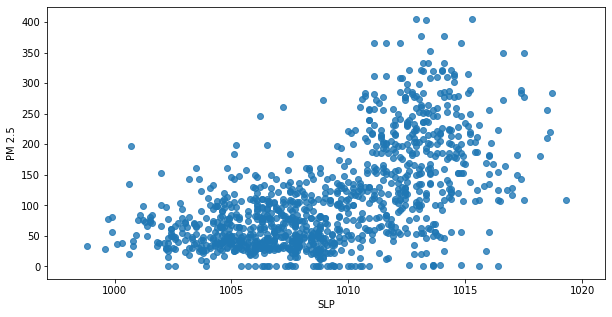

In [12]:
plt.subplots(figsize=(10,5))
sns.regplot(x='SLP',y='PM 2.5',data=aqi_df,fit_reg=False)

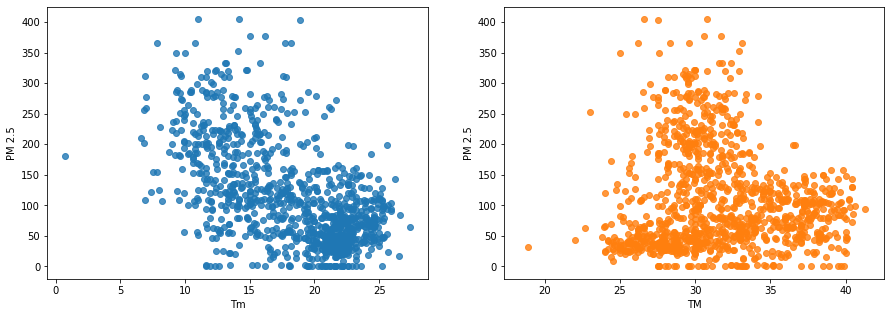

In [13]:
fig,axs=plt.subplots(figsize=(15,5),ncols=2)
sns.regplot(x='Tm',y='PM 2.5',data=aqi_df,fit_reg=False,scatter=True,ax=axs[0],label='Minimum temp vs AQI')
sns.regplot(x='TM',y='PM 2.5',data=aqi_df,fit_reg=False,scatter=True,ax=axs[1])

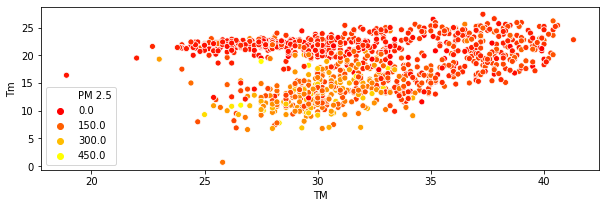

In [14]:
plt.subplots(figsize=(10,3))
sns.scatterplot(x='TM',y='Tm',hue='PM 2.5',data=aqi_df,palette='autumn')

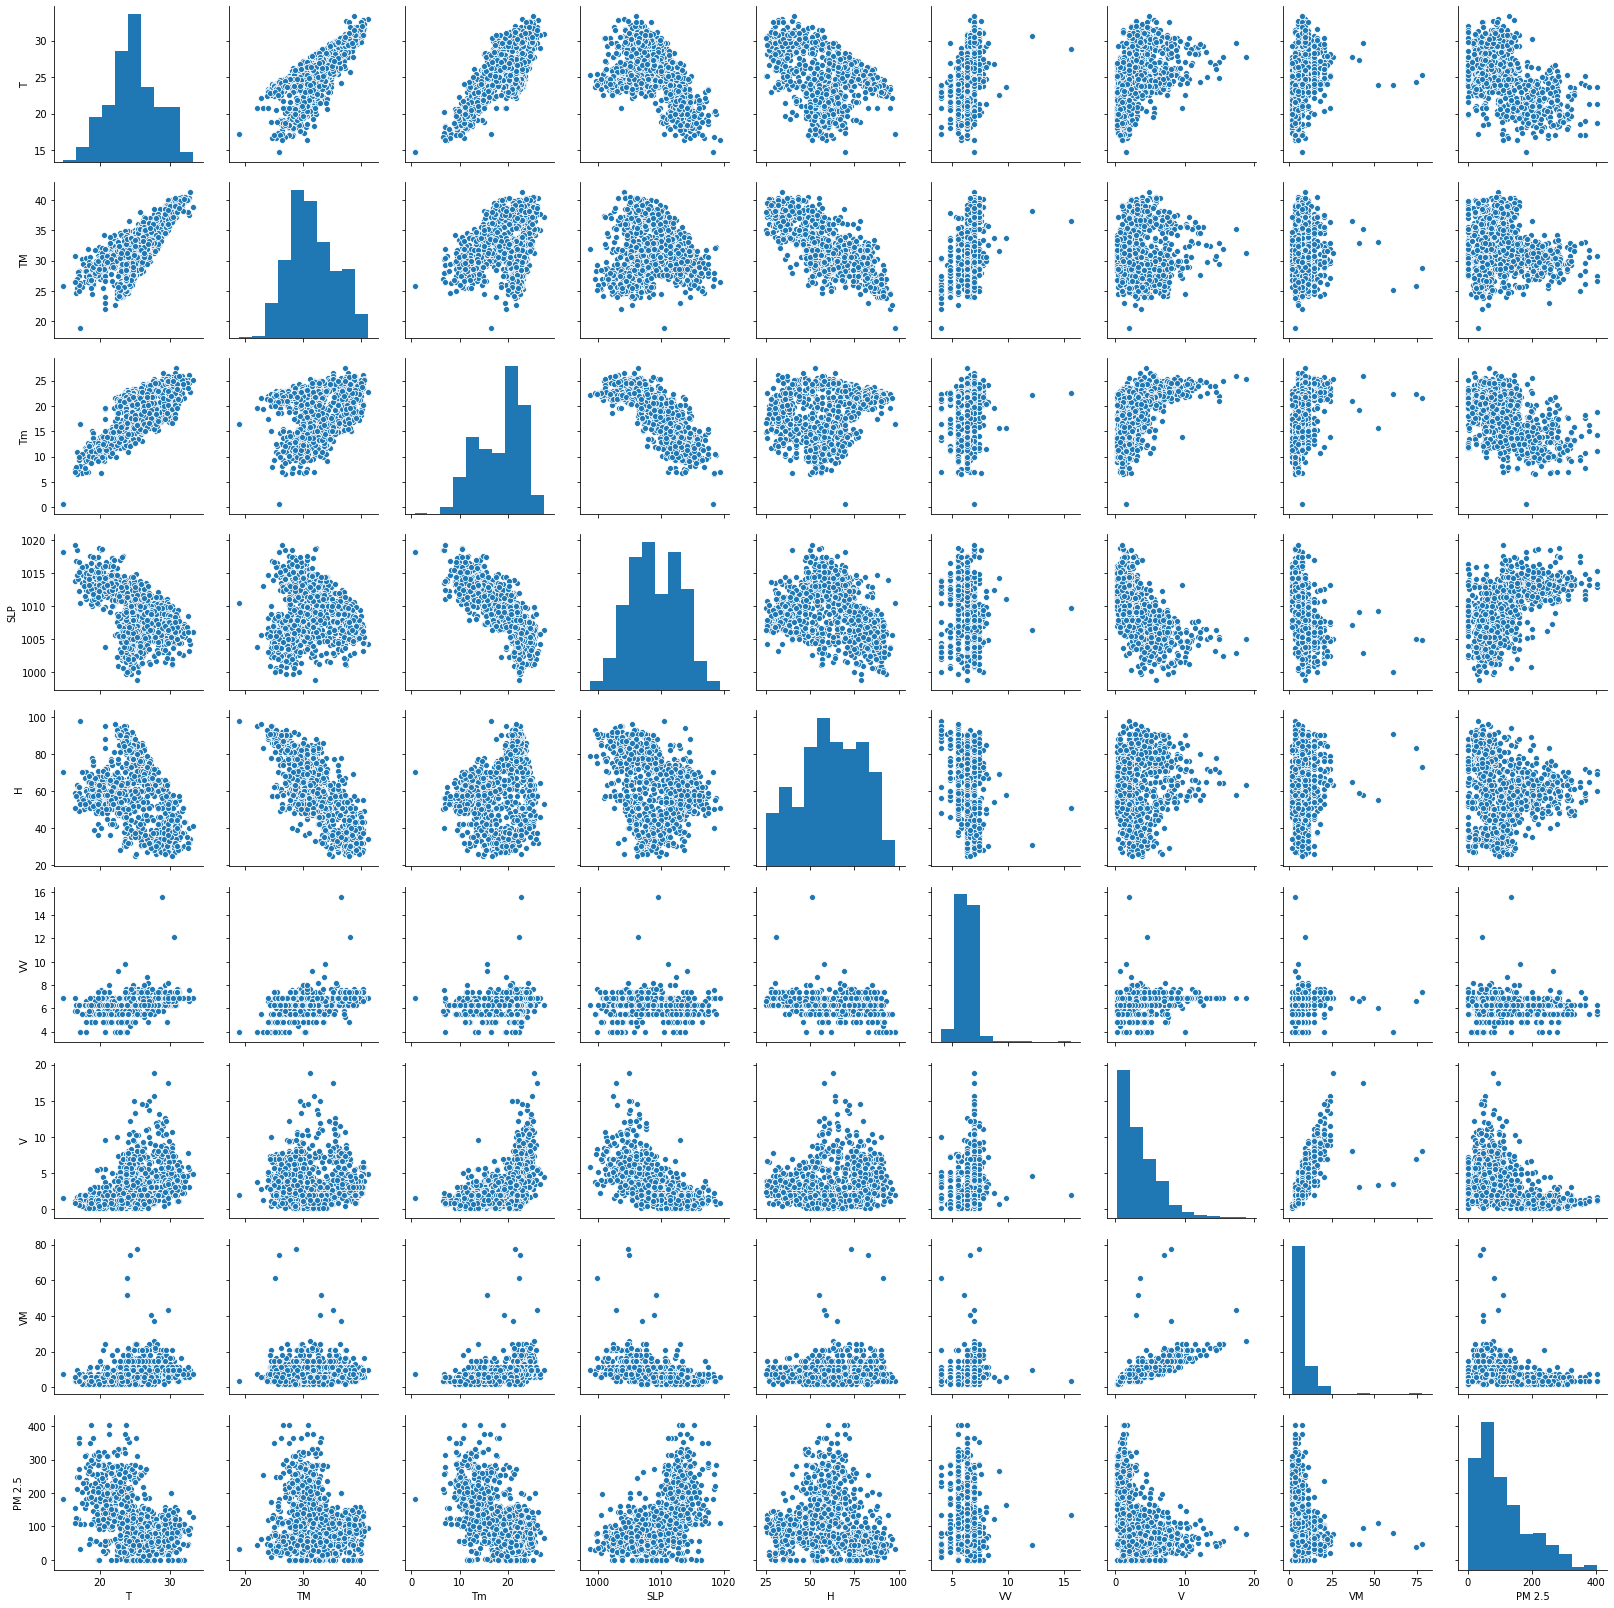

In [34]:
sns.pairplot(aqi_df)
plt.show()

In [16]:
x=aqi_df.drop('PM 2.5',axis=1)
y=aqi_df['PM 2.5']

In [17]:
model=ExtraTreesRegressor()

model.fit(x,y)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

Following are the importance meter of the input features : 
 ['18.0%', '9.0%', '19.0%', '19.0%', '13.0%', '5.0%', '12.0%', '5.0%']
Top 5 important features :


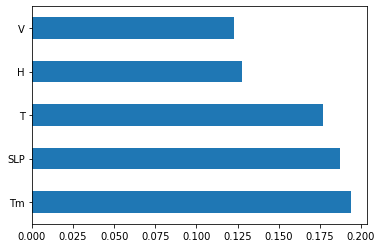

In [33]:
print('Following are the importance meter of the input features : \n',[str(round(x*100))+'%' for x in model.feature_importances_])

feature_importance=(pd.Series(model.feature_importances_,index=x.columns))
print('Top 5 important features :')
feature_importance.nlargest(5).plot(kind='barh')
plt.show()

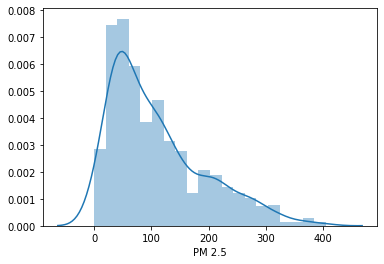

In [40]:
sns.distplot(y)
plt.show()

In [54]:
print('Shape of the input and output features -',x.shape,y.shape )

Shape of the input and output features - (1093, 8) (1093,)


In [90]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

In [91]:
print('Shape of the training and testing sets -',X_train.shape,y_train.shape,X_test.shape,y_test.shape )

Shape of the training and testing sets - (765, 8) (765,) (328, 8) (328,)


In [92]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)
print('R- square score for train set - ',linreg.score(X_train,y_train))
print('R- square score for test set - ',linreg.score(X_test,y_test))

R- square score for train set -  0.3894711976117762
R- square score for test set -  0.4049933790533462


In [93]:
y_pred=linreg.predict(X_test)

In [100]:
cv_score=cross_val_score(linreg,x,y,cv=5)
print('Cross validation score :',cv_score.mean())
print('Coefficient : {}\nIntercept : {} '.format(linreg.coef_,linreg.intercept_))

Cross validation score : 0.34820234401674854
Coefficient : [-13.65721876   8.39688134  -0.05483804   4.84229902   0.04689375
  -6.9053563   -0.66486643  -0.36362075]
Intercept : -4657.114605167597 


In [103]:
#Model Evaluation

coeff_df=pd.DataFrame(linreg.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,-13.657219
TM,8.396881
Tm,-0.054838
SLP,4.842299
H,0.046894
VV,-6.905356
V,-0.664866
VM,-0.363621


In [135]:
for rows in coeff_df.values:
    for i in range(len(rows)):
        print('Keeping all the other features fixed , for unit increase in {}, the AQI will get changed by {}'.format(coeff_df.index[i],rows[i]))
    

Keeping all the other features fixed , for unit increase in T, the AQI will get changed by -13.657218759824604
Keeping all the other features fixed , for unit increase in T, the AQI will get changed by 8.39688134004986
Keeping all the other features fixed , for unit increase in T, the AQI will get changed by -0.05483803960010415
Keeping all the other features fixed , for unit increase in T, the AQI will get changed by 4.842299017568726
Keeping all the other features fixed , for unit increase in T, the AQI will get changed by 0.046893749192596854
Keeping all the other features fixed , for unit increase in T, the AQI will get changed by -6.905356304827851
Keeping all the other features fixed , for unit increase in T, the AQI will get changed by -0.6648664347897556
Keeping all the other features fixed , for unit increase in T, the AQI will get changed by -0.36362074881681666


Residual distribution amd scatter plot


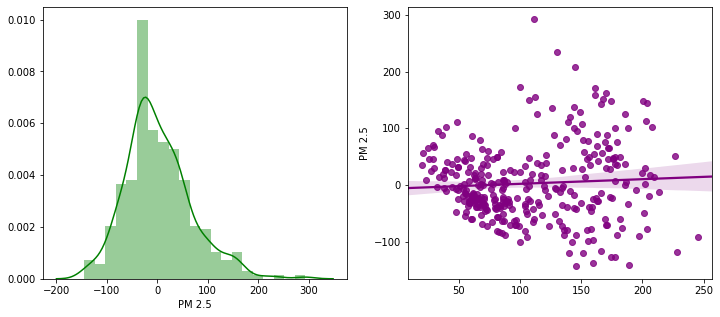

In [159]:
fig,axs=plt.subplots(figsize=(12,5),ncols=2)
print('Residual distribution amd scatter plot')
sns.distplot(y_test-y_pred,color='green',ax=axs[0])
sns.regplot(x=y_pred,y=y_test-y_pred,data=aqi_df,scatter=True,fit_reg=True,color='purple',ax=axs[1])
plt.show()

In [163]:
from sklearn import metrics
print('Mean Absolute Error :-',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error :-',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error :-',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error :- 50.36522634676879
Mean Squared Error :- 4327.148982078599
Root Mean Squared Error :- 65.7810685689933


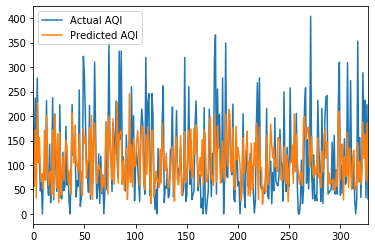

In [141]:
test_pred_comparision=pd.DataFrame({'Actual AQI':y_test,'Predicted AQI':y_pred})
test_pred_comparision=test_pred_comparision.reset_index(drop=True)

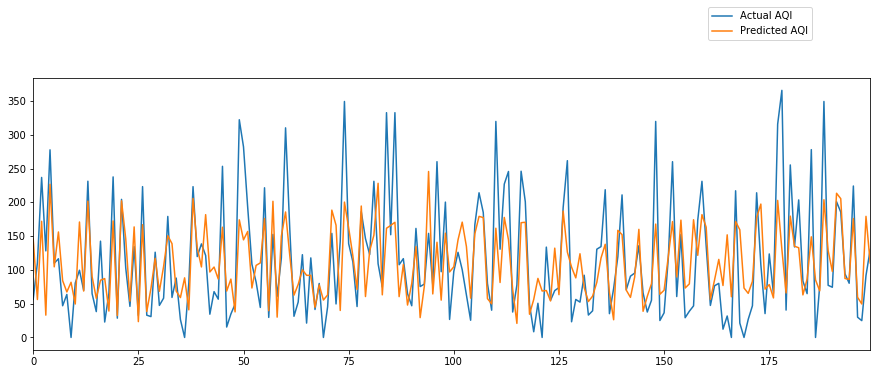

In [148]:
test_pred_comparision[:200].plot.line(figsize=(15,5))
plt.legend(loc=6,bbox_to_anchor=([0.8,0.8,0.8,0.8]))
plt.show()

In [166]:
#Creating pickle file for model deployment.

import pickle

file=open('regressor_model.pkl','wb')
pickle.dump(linreg,file)